In [1260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1261]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('gender_submission.csv')

In [1262]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [1263]:
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [1264]:
submission_data.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


# Exploratory Data Analysis (EDA)
- This section explores and analyzes the dataset to extract meaningful insights and patterns.

In [1265]:
def plot_survival_counts_by_class(dataset, class_column, survival_column):
    # Group by the specified class and survival columns and count the occurrences
    survival_counts = dataset.groupby([class_column, survival_column]).size().unstack(fill_value=0)

    survival_counts.plot(kind='bar', stacked=True, figsize=(8,6), color=['red', 'green'])

    plt.title(f'Survival and Non-Survival Counts by {class_column}')
    plt.xlabel(class_column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['Non-Survived', 'Survived'], title='Survival Status', loc='upper left')
    plt.show()

- This function plots a stacked bar chart showing survival counts based on a specified class feature.

In [1266]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1267]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1. `Pclass`, `Sex`, `SibSp`, and `Parch` are categorical features with no missing values.


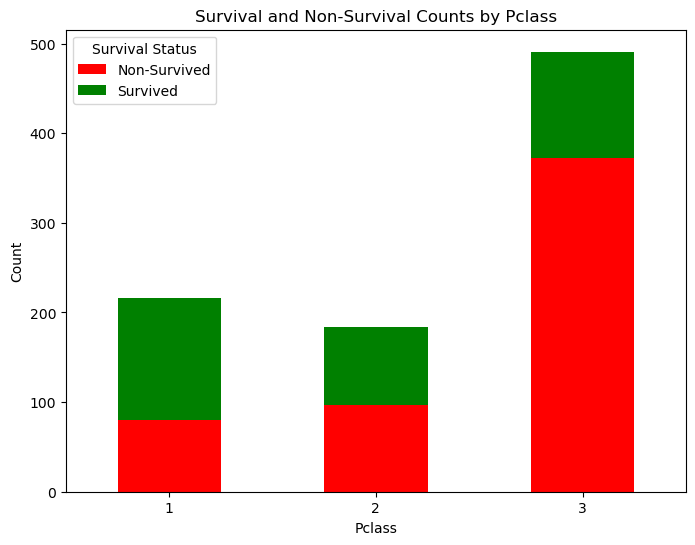

In [1268]:
plot_survival_counts_by_class(dataset=train_data,class_column='Pclass', survival_column='Survived')

- The survival rate is highest in the 1st class, followed by the 2nd class, and lowest in the 3rd class.

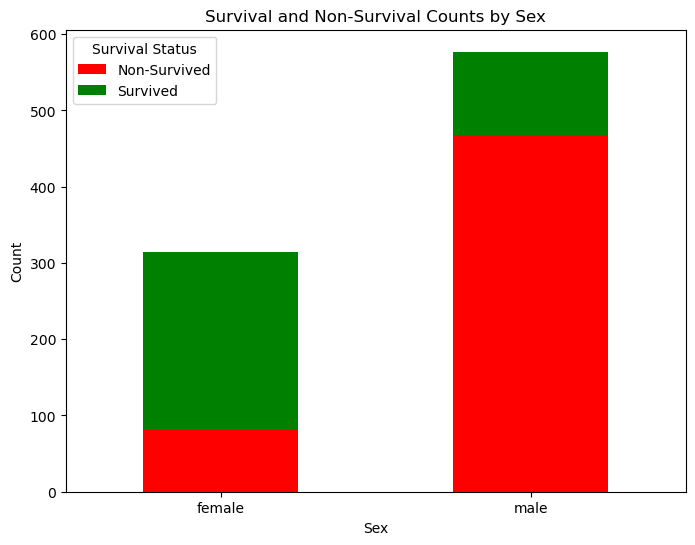

In [1269]:
plot_survival_counts_by_class(dataset=train_data,class_column='Sex', survival_column='Survived')

- The survival rate is higher for females compared to males.

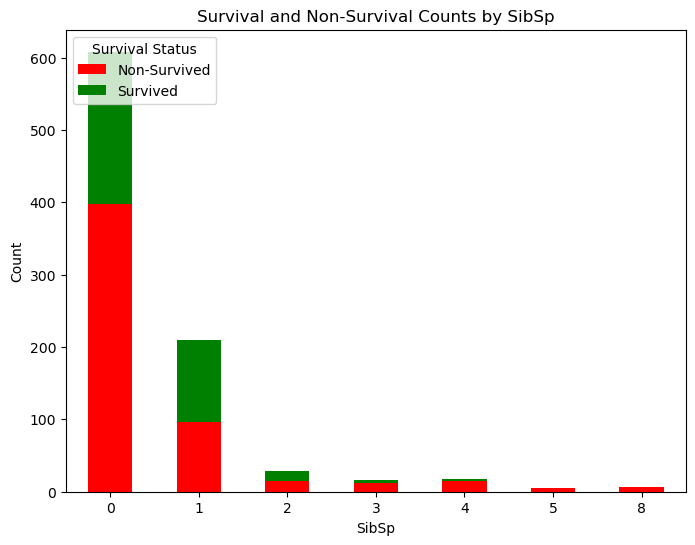

In [1270]:
plot_survival_counts_by_class(dataset=train_data,class_column='SibSp', survival_column='Survived')

- The survival rate is highest for passengers with 1 sibling/spouse aboard, followed by those with 0 or 2 siblings/spouses. Passengers with more than 2 siblings/spouses had a lower survival rate.

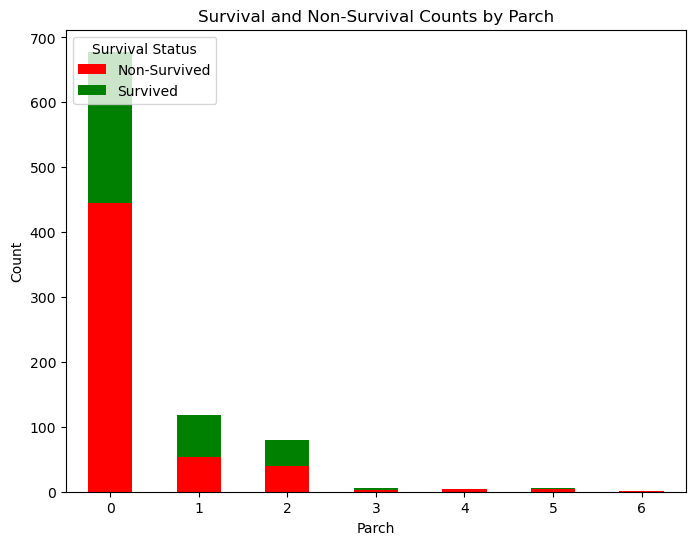

In [1271]:
plot_survival_counts_by_class(dataset=train_data,class_column='Parch', survival_column='Survived')

- The survival rate is highest for passengers with 1 or 2 parents/children aboard, followed by those with none. Passengers with more than 2 parents/children had a lower survival rate.

In [1272]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. `Fare` and `Age` are numerical features.

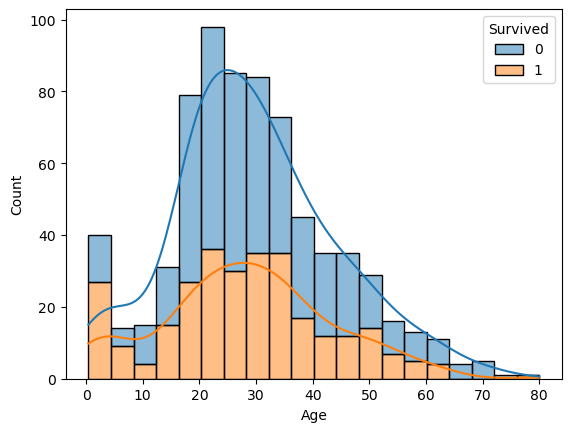

In [1273]:
sns.histplot(train_data, x='Age', hue='Survived', multiple='stack', kde=True)
plt.show()

- Age bands can be created for further analysis.

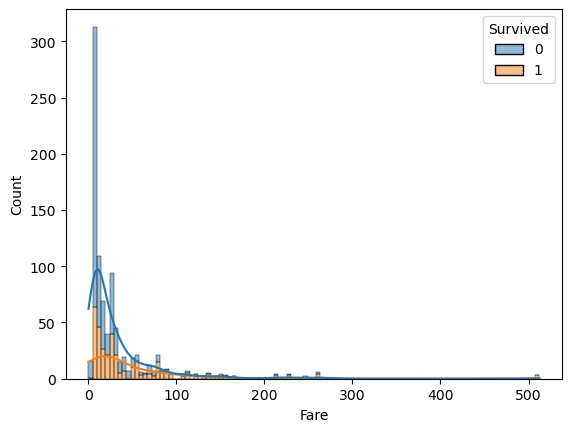

In [1274]:
sns.histplot(train_data, x='Fare', hue='Survived', multiple='stack', kde=True)
plt.show()

- The fare distribution shows significant outliers. Higher fare correlates with a higher survival rate. Instead of removing outliers, we will apply a Log1p transformation.


# Feature Engineering
- This section focuses on creating new features or transforming existing features to improve the model's performance.


In [1275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1276]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### 1. PClass

In [1277]:
train_data['Pclass'] = train_data['Pclass'].map({1:3, 2:2, 3:0})

test_data['Pclass'] = test_data['Pclass'].map({1:3, 2:2, 3:0})

- Mapping `Pclass` values to create a linear distribution and a positive correlation with survival.

### 2. Family Size

In [1278]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + 1

- Creating a new feature `Family` to represent the total family size by summing `SibSp`, `Parch`, and adding 1 (for the individual).


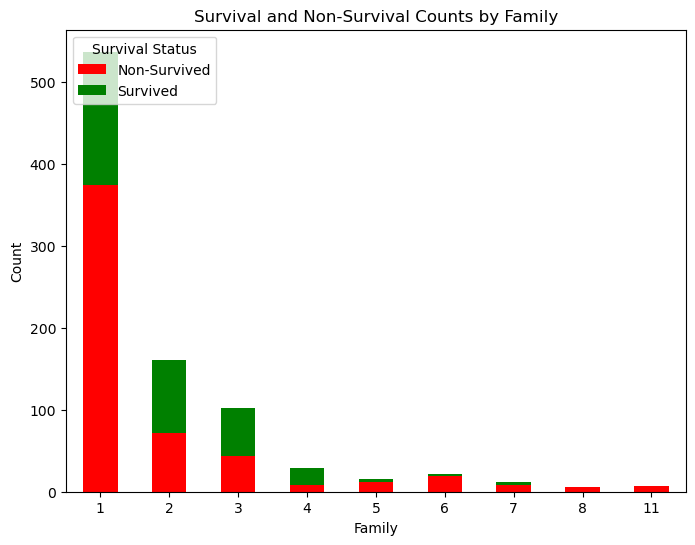

In [1279]:
plot_survival_counts_by_class(train_data, 'Family', 'Survived')

- Survival chance is highest for family sizes of 2, 3, and 4; medium for a family size of 1; and lowest for family sizes between 5 and 10.

In [1280]:
# Update 'Family' column based on specific conditions
train_data.loc[train_data['Family'] <= 1, 'Family'] = 1  
train_data.loc[(train_data['Family'] > 1) & (train_data['Family'] <= 4), 'Family'] = 2  
train_data.loc[train_data['Family'] > 4, 'Family'] = 0  


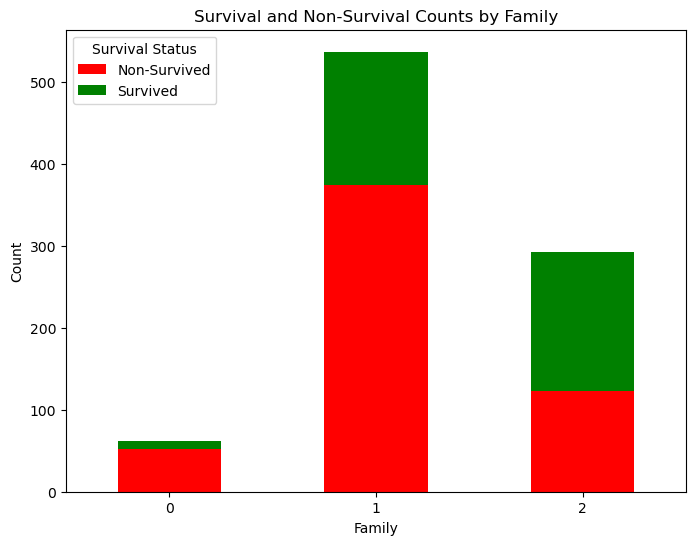

In [1281]:
plot_survival_counts_by_class(train_data, 'Family', 'Survived')

In [1282]:
correlation = train_data[['SibSp', 'Survived']].corr()
correlation

,SibSp,Survived
SibSp,1.000000,-0.035322
Survived,-0.035322,1.000000


In [1283]:
correlation = train_data[['Parch', 'Survived']].corr()
correlation

,Parch,Survived
Parch,1.000000,0.081629
Survived,0.081629,1.000000


In [1284]:
correlation = train_data[['Family', 'Survived']].corr()
correlation

,Family,Survived
Family,1.00000,0.28381
Survived,0.28381,1.00000


- By combining `SibSp` and `Parch` into the `Family` feature, the correlation with survival significantly increased.

### 3. Fare

- Fare has all non null value

In [1285]:
correlation = train_data[['Fare', 'Survived']].corr()
correlation

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


In [1286]:
# Apply log1p transformation
train_data['Fare_Log1p'] = np.log1p(train_data['Fare'])
test_data['Fare_Log1p'] = np.log1p(test_data['Fare'])


In [1287]:
correlation = train_data[['Fare_Log1p', 'Survived']].corr()
correlation

,Fare_Log1p,Survived
Fare_Log1p,1.000000,0.329862
Survived,0.329862,1.000000


- Applying Log1p transformation to `Fare` increases the positive correlation with survival.


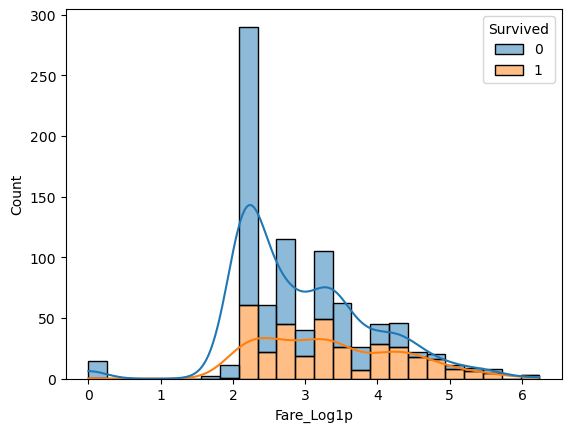

In [1288]:
sns.histplot(train_data, x='Fare_Log1p', hue='Survived', multiple='stack', kde=True)
plt.show()

In [1289]:
train_data['Fare_Log1p'].isnull().sum(), test_data['Fare_Log1p'].isnull().sum()

(0, 1)

- Test data has one null value in `Fare_Log1p`, which is filled with the mode value.


In [1290]:
test_data['Fare_Log1p'].fillna(test_data['Fare_Log1p'].mode()[0], inplace = True)

C:\Users\Durjay\AppData\Local\Temp\ipykernel_9160\290086928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Fare_Log1p'].fillna(test_data['Fare_Log1p'].mode()[0], inplace = True)


### 4. Fixing data types for columns `Name`, `Sex`, `Cabin`, and `Embarked` to prepare for model training.


In [1291]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Family       891 non-null    int64  
 13  Fare_Log1p   891 non-null    float64
dtypes: float64(3), int64(6), object(5)
memory usage: 97.6+ KB


In [1292]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Family       418 non-null    int64  
 12  Fare_Log1p   418 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.6+ KB


#### 4.1 Sex

In [1293]:
train_data['Sex'].unique(), test_data['Sex'].unique()

(array(['male', 'female'], dtype=object),
 array(['male', 'female'], dtype=object))

- Mapping `Sex` column: male to 0, female to 1 for both train and test datasets.

In [1294]:
sex_map = {'male':0, 'female':1}
train_data['Sex'] = train_data['Sex'].map(sex_map)
test_data['Sex'] = test_data['Sex'].map(sex_map)

#### 2.2 Name

In [1295]:
train_data['Title'] = train_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

In [1296]:
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [1297]:
train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

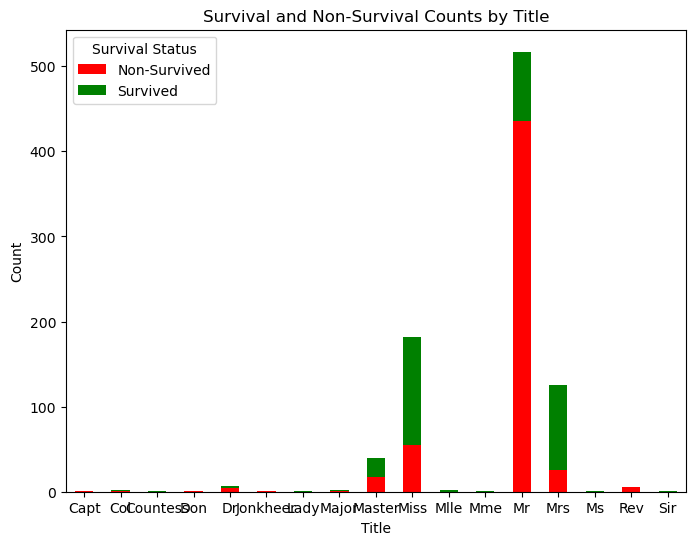

In [1298]:
plot_survival_counts_by_class(train_data, 'Title', 'Survived')

- Extracted `Title` from `Name` and mapping it to 1 (high survival rate) or 0 (low survival rate).

In [1299]:
title_map = {
    'Mr': 0,
    'Mrs': 1,
    'Miss': 1,
    'Master': 1,
    'Don': 0,
    'Rev': 0,
    'Dr': 0,
    'Mme': 1,
    'Ms': 1,
    'Major': 0,
    'Lady': 1,
    'Sir': 1,
    'Mlle': 1,
    'Col': 0,
    'Capt': 0,
    'Countess': 1,
    'Jonkheer': 0
}


In [1300]:
train_data['Title'] = train_data['Title'].map(title_map)

In [1301]:
test_data['Title'] = test_data['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Title'].map(title_map)

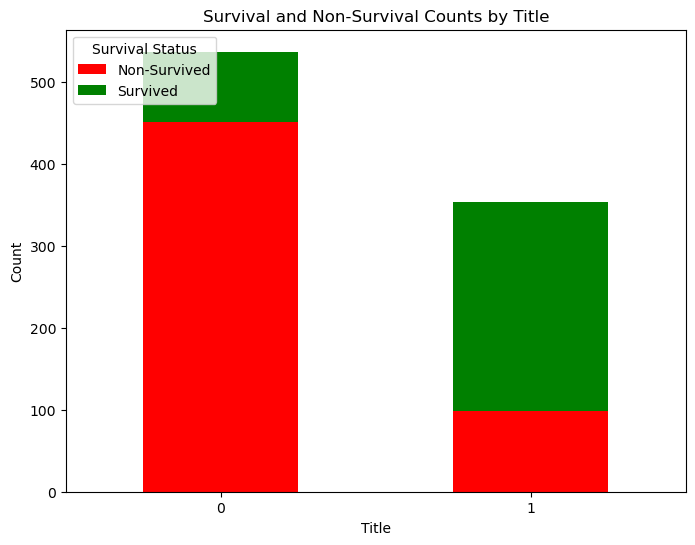

In [1302]:
plot_survival_counts_by_class(train_data,'Title', 'Survived')

#### 4.3 Embarked

In [1303]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1304]:
train_data['Embarked']=train_data['Embarked'].map({'S':1, 'C':0, 'Q':2})
test_data['Embarked']=test_data['Embarked'].map({'S':1, 'C':0, 'Q':2})

- Mapping `Embarked` values to numerical categories (S=1, C=0, Q=2) to achieve proper positive correlation with survival.

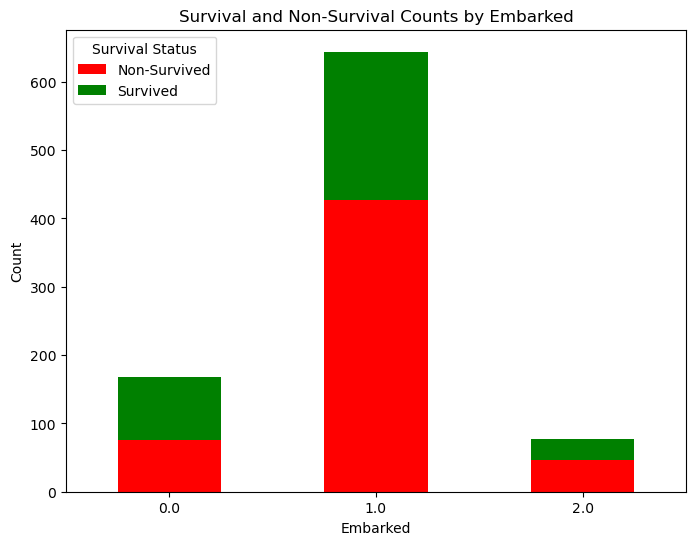

In [1305]:
plot_survival_counts_by_class(train_data,'Embarked', 'Survived')

#### 4.4 Cabin

In [1306]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- Catagorise Cabin with first letter

In [1307]:
train_data['Cabin'] = train_data['Cabin'].str[:1]
test_data['Cabin'] = test_data['Cabin'].str[:1]

In [1308]:
train_data['Cabin'].unique(), test_data['Cabin'].unique()

(array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object),
 array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object))

In [1309]:
cabin_map = {'C':0, 'E':3, 'G':6, 'D':2, 'A':4, 'B':1, 'F':5, 'T':6}

- Extracted first letter of `Cabin` and mapped it to numerical values for proper correlation with survival.

In [1310]:
train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

### 5. Missing Values
- Handling missing values in the dataset for better model performance.


In [1311]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family           0
Fare_Log1p       0
Title            0
dtype: int64

In [1312]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
Fare_Log1p       0
Title            1
dtype: int64

#### 1. `train['Embarked']` and `test['Title]`

In [1313]:
train_data['Embarked'].value_counts()

Embarked
1.0    644
0.0    168
2.0     77
Name: count, dtype: int64

In [1314]:
train_data['Embarked'].fillna(0, inplace=True)
test_data['Title'].fillna(0, inplace=True)

C:\Users\Durjay\AppData\Local\Temp\ipykernel_9160\2846500782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(0, inplace=True)
C:\Users\Durjay\AppData\Local\Temp\ipykernel_9160\2846500782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

- Filled missing values in `Embarked` and `Title` columns with 0.

### 5.2 Age

In [1315]:
numerical_correlation = train_data.corr(numeric_only=True)['Age'].sort_values(ascending=False)
print(numerical_correlation)


Age            1.000000
Pclass         0.355843
Fare_Log1p     0.116495
Fare           0.096067
PassengerId    0.036847
Family         0.031140
Embarked      -0.049420
Survived      -0.077221
Sex           -0.093254
Cabin         -0.111037
Parch         -0.189119
Title         -0.268168
SibSp         -0.308247
Name: Age, dtype: float64


- Filled missing values in `Age` based on the median age grouped by `Pclass`.


In [1316]:
train_data['Age'] = train_data.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test_data['Age'] = test_data.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


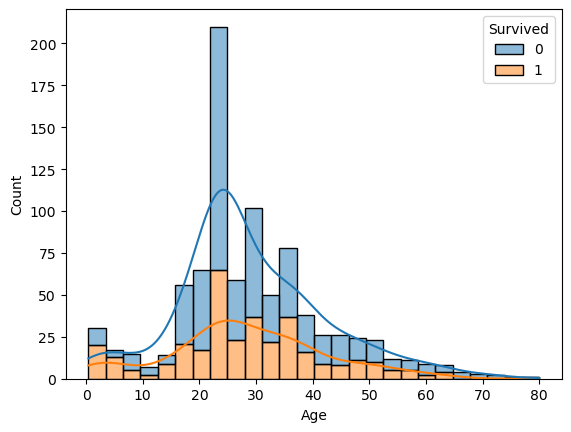

In [1317]:
sns.histplot(data=train_data, x='Age', hue='Survived', kde=True, multiple='stack')
plt.show()

In [1318]:
# Defining bins and labels with a gap of 2 years
age_bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80]
age_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]

# Applying bins and labels to train and test data
train_data['Age_Band'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)
test_data['Age_Band'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels, right=False)


In [1319]:
train_data['Age_Band'].isnull().sum(), test_data['Age_Band'].isnull().sum()

(1, 0)

In [1320]:
train_data['Age_Band'].fillna(train_data['Age_Band'].mode()[0], inplace=True)

C:\Users\Durjay\AppData\Local\Temp\ipykernel_9160\2666646286.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age_Band'].fillna(train_data['Age_Band'].mode()[0], inplace=True)


In [1321]:

train_data['Age_Band'] = train_data['Age_Band'].astype(int)
test_data['Age_Band'] = test_data['Age_Band'].astype(int)

In [1322]:
correlation = train_data[['Age_Band', 'Survived']].corr()
correlation

,Age_Band,Survived
Age_Band,1.000000,-0.054881
Survived,-0.054881,1.000000


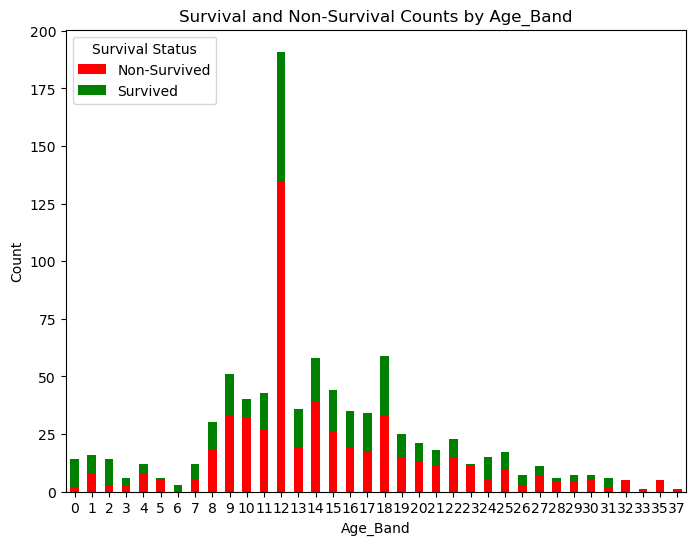

In [1323]:
plot_survival_counts_by_class(train_data, 'Age_Band', 'Survived')

- Categorized `Age` into bands with a gap of 2 years and mapped survival rates.
- Mapping `Age_Band` to 1 for higher survival chances and 0 for lower survival chances.

In [1324]:
age_band_map = {0: 1, 1: 1, 2: 1, 3: 1, 6: 1, 7: 1, 8: 1, 13: 1, 15: 1, 16: 1, 17: 1, 18: 1, 24: 1, 25: 1, 26: 1, 29: 1, 31: 1}

# Applying the mapping to 'Age_Band' in train_data and test_data, defaulting to 0
train_data['Age_Band'] = train_data['Age_Band'].map(age_band_map).fillna(0).astype(int)
test_data['Age_Band'] = test_data['Age_Band'].map(age_band_map).fillna(0).astype(int)


### 5.3 Cabin

In [1325]:
train_data['Cabin'].unique()

array([nan,  0.,  3.,  6.,  2.,  4.,  1.,  5.])

In [1326]:
numerical_data = train_data.select_dtypes(include=['int', 'float'])

# Compute the correlation between Cabin and other numerical columns
correlation = numerical_data.corr()['Cabin'].sort_values(ascending=False)
print(correlation)


Cabin          1.000000
Embarked       0.171143
Title          0.002547
Family        -0.015217
Survived      -0.035486
Parch         -0.035691
PassengerId   -0.046151
Sex           -0.071397
Age_Band      -0.073917
Age           -0.122419
SibSp         -0.143929
Fare          -0.399880
Fare_Log1p    -0.477295
Pclass        -0.565790
Name: Cabin, dtype: float64


In [1327]:
correlation = train_data[['Cabin', 'Survived']].corr()
correlation

,Cabin,Survived
Cabin,1.000000,-0.035486
Survived,-0.035486,1.000000


- Analyzed correlation between `Cabin` and numerical columns.
- Filled missing `Cabin` values based on the mode of corresponding `Pclass` to leverage the correlation between `Pclass` and `Cabin`.


In [1328]:
train_data['Cabin'] = train_data.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [1329]:
test_data['Cabin'] = test_data.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))

In [1330]:
train_data['Cabin'].isnull().sum(), test_data['Cabin'].isnull().sum()

(0, 0)

In [1331]:
train_data['Cabin'].value_counts(), test_data['Cabin'].value_counts()

(Cabin
 5.0    660
 0.0     99
 1.0     47
 2.0     33
 3.0     32
 4.0     15
 6.0      5
 Name: count, dtype: int64,
 Cabin
 5.0    308
 0.0     62
 1.0     18
 2.0     13
 3.0      9
 4.0      7
 6.0      1
 Name: count, dtype: int64)

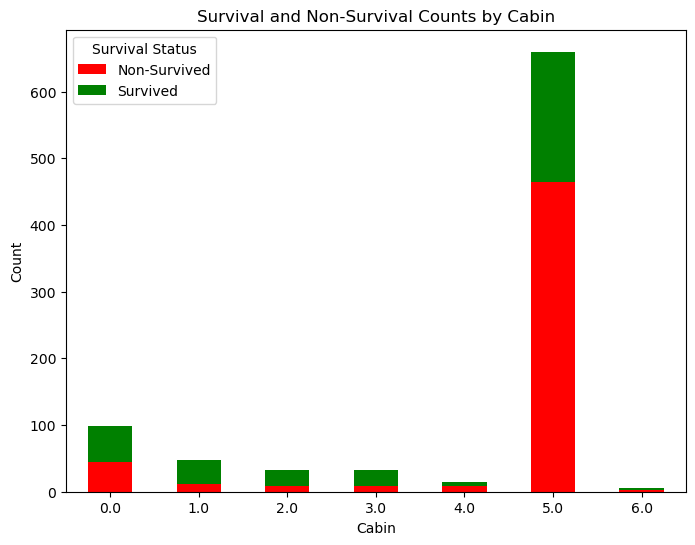

In [1332]:
plot_survival_counts_by_class(train_data, 'Cabin', 'Survived')

- Visualized survival count based on `Cabin` and mapped `Cabin` values to indicate higher (1) or lower (0) survival chances.

In [1333]:
cabin_map = {0:1, 1:1, 2:1, 3:1, 4:0, 5:0, 6:0}

train_data['Cabin'] = train_data['Cabin'].map(cabin_map)
test_data['Cabin'] = test_data['Cabin'].map(cabin_map)

In [1334]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    float64
 12  Family       891 non-null    int64  
 13  Fare_Log1p   891 non-null    float64
 14  Title        891 non-null    int64  
 15  Age_Band     891 non-null    int32  
dtypes: float64(4), int32(1), int64(9), object(2)
memory usage: 108.0+ KB


In [1335]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Family       418 non-null    int64  
 12  Fare_Log1p   418 non-null    float64
 13  Title        418 non-null    float64
 14  Age_Band     418 non-null    int32  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 47.5+ KB


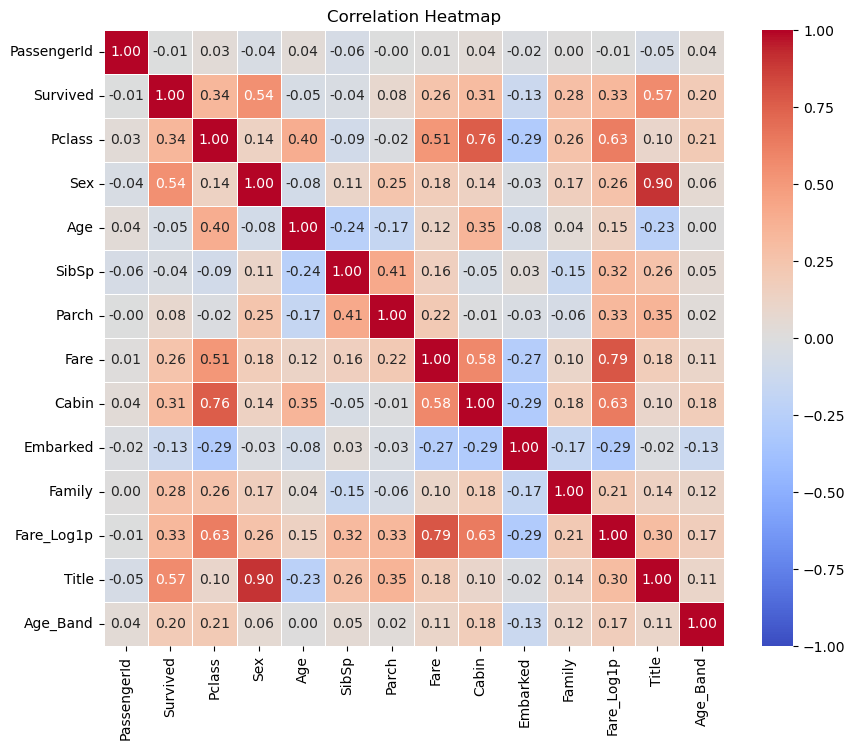

In [1336]:
# Plot the heatmap
numeric_data = train_data.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Correlation Heatmap')
plt.show()


- Identified low correlation of `Survived` with columns like `PassengerId`, `Name`, `Ticket`, `Age`, `SibSp`, `Parch` and decided to drop them.


In [1337]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    float64
 12  Family       891 non-null    int64  
 13  Fare_Log1p   891 non-null    float64
 14  Title        891 non-null    int64  
 15  Age_Band     891 non-null    int32  
dtypes: float64(4), int32(1), int64(9), object(2)
memory usage: 108.0+ KB


In [1338]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    int64  
 10  Embarked     418 non-null    int64  
 11  Family       418 non-null    int64  
 12  Fare_Log1p   418 non-null    float64
 13  Title        418 non-null    float64
 14  Age_Band     418 non-null    int32  
dtypes: float64(4), int32(1), int64(8), object(2)
memory usage: 47.5+ KB


### Drop Unnecessary feature

In [1339]:

train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age', 'SibSp', 'Parch','Fare', 'Embarked'], inplace=True)

test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], inplace=True)


# Modeling


In [1340]:
y_train = train_data['Survived']
x_train = train_data.drop(columns='Survived')

x_test = test_data
y_test = submission_data['Survived']

In [1341]:
x_train.shape, y_train.shape

((891, 7), (891,))

In [1342]:
x_test.shape, y_test.shape

((418, 7), (418,))

In [1343]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RandomizedSearchCV

### Model Evaluation using Cross-Validation

In this section, we evaluate the performance of several machine learning models on the Titanic dataset using 5-fold cross-validation. The models included in the evaluation are:

- Logistic Regression
- Decision Tree Classifier
- K-Nearest Neighbors Classifier
- Support Vector Classifier
- Naive Bayes Classifier
- Random Forest Classifier

For each model, we calculate the mean accuracy score using cross-validation. The results are stored in a DataFrame, which allows us to compare the performance of each model and identify the most accurate one for this dataset.


In [1344]:
# Define the models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier()
}

results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, train_data.drop(['Survived'], axis=1), train_data['Survived'], cv=5)
    results.append({'Model': name, 'Mean Accuracy': cv_scores.mean()})



In [1345]:
results_df = pd.DataFrame(results)

results_df

,Model,Mean Accuracy
0,Logistic Regression,0.822698
1,Decision Tree,0.803622
2,K-Nearest Neighbors,0.823853
3,Support Vector Classifier,0.834995
4,Naive Bayes,0.786806
5,Random Forest,0.793516


### Hyperparameter Tuning for Decision Tree Classifier with RandomizedSearchCV

In this step, we use **RandomizedSearchCV** to tune the **Decision Tree Classifier**'s hyperparameters, including `max_depth`, `min_samples_split`, and `min_samples_leaf`. The model is trained using 5-fold cross-validation, and the best hyperparameters are identified. We then evaluate the model's performance on both the training and test datasets.

#### Output:
- **Best Parameters**: The optimal hyperparameters for the model.
- **Test Accuracy**: Accuracy on the test set.
- **Train Accuracy**: Accuracy on the training set.


In [1347]:
# Define the model
dt = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_dist = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
}

random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=1)

random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_dt = random_search.best_estimator_

test_score = best_dt.score(x_test, y_test) * 100
train_score = best_dt.score(x_train, y_train) * 100

print(f"Test Accuracy: {test_score:.2f}%")
print(f"Train Accuracy: {train_score:.2f}%")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 6, 'max_depth': 8}
Test Accuracy: 86.84%
Train Accuracy: 86.76%


#### Conclusion from Hyperparameter Tuning for Decision Tree

After performing **RandomizedSearchCV** on the **Decision Tree Classifier**, the best hyperparameters were found to be:
- **min_samples_split**: 20
- **min_samples_leaf**: 6
- **max_depth**: 8

With these optimized parameters, the model achieved a **Test Accuracy of 86.84%** and a **Train Accuracy of 86.76%**, which shows a small difference between the training and testing accuracies, indicating that the model is not overfitting.

This performance is a significant improvement over the baseline **cross-validation score of 80.47%**. 

This approach can be similarly applied to other models to find their best hyperparameters using **RandomizedSearchCV**, which helps improve model performance and accuracy by fine-tuning critical parameters.
